In [1]:
# Importing libraires and defining model for fitting
import os
import ccd_helpers
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from skimage import morphology as morph
import lmfit
import math
from lmfit.models import GaussianModel
from lmfit.lineshapes import gaussian
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter
from PIL import Image, ImageOps
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion

## Image data loading and Selection defining

In [2]:
# load image and convert data
img = Image.open('001.tiff')
z_grid = np.array(img).astype('float')  

# Selection
selection = [ [-0.546, 0, 0.2775, 0.8325],
              [-0.546, 0, - 0.2775, 0.2775],
              [-0.546, 0, -0.8325, - 0.2775],
              [0, 0.546, 0.2775, 0.8325],
              [0, 0.546, - 0.2775,  0.2775],
              [0, 0.546, -0.8325, - 0.2775] ]

# Local minimization function 'fun'

In [3]:
# Getting the peak paramters to pass into the sum_2dgaussians function; 
    # Saving the a, cx, cy we got from detect peaks and also bx, by as 0.01
peak_param = ccd_helpers.get_peak_param(z_grid, 0.01, 0.01)

# Defining a objective function for the minimize library
def fun(peak_param):
    sqr_diff = (z_grid - ccd_helpers.sum_2dgaussians(x_grid, y_grid, peak_param))**2
    return np.sqrt(np.sum(sqr_diff))


# Using the minimize library with 'fun' and looking at the time taken with the various 'minimize' methods
## Plotting it against the Raw Data and Sum of Gauss with peaks detected

In [4]:
# Get the dimensions of the image; used to create the x and y values
dimensions = z_grid.shape 

# With the length of the second dimension, create - 1 ~ 1 with dimensions[1] value 
x = np.linspace(-1, 1, dimensions[1])

# With the length of the first dimension, create - 1 ~ 1 with dimensions[0] value
y = np.linspace(1, -1, dimensions[0])

# create meshgrid as before
x_grid, y_grid = np.meshgrid(x, y) 

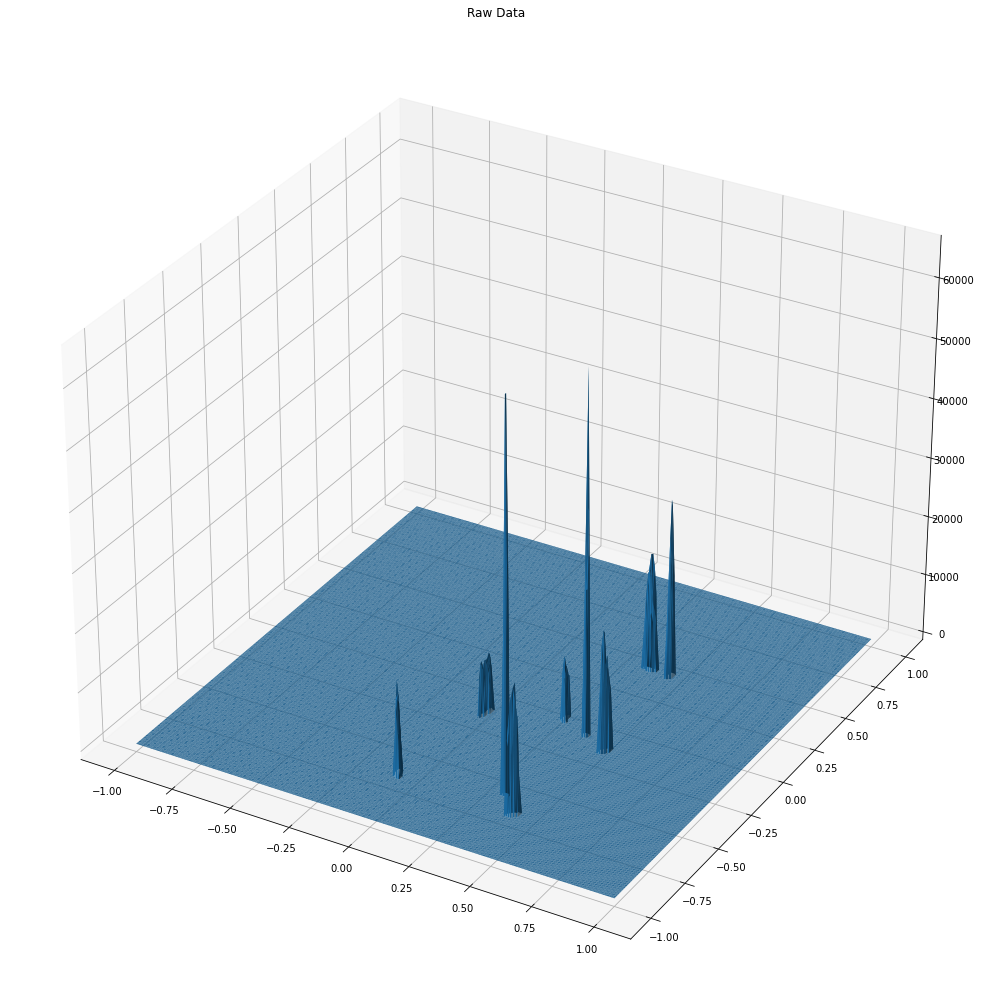

Completed the graph in 9.4788 seconds


In [5]:
# Import for calculating time taken to optimize
import time

# Raw Data
X = x_grid.flatten()
Y = y_grid.flatten()

Z = z_grid.flatten()
tic = time.perf_counter()
ccd_helpers.tri_plot(X, Y, Z, "Raw Data")
toc = time.perf_counter()
print(f"Completed the graph in {toc - tic:0.4f} seconds")


Completed the optimization in 0.0100 seconds


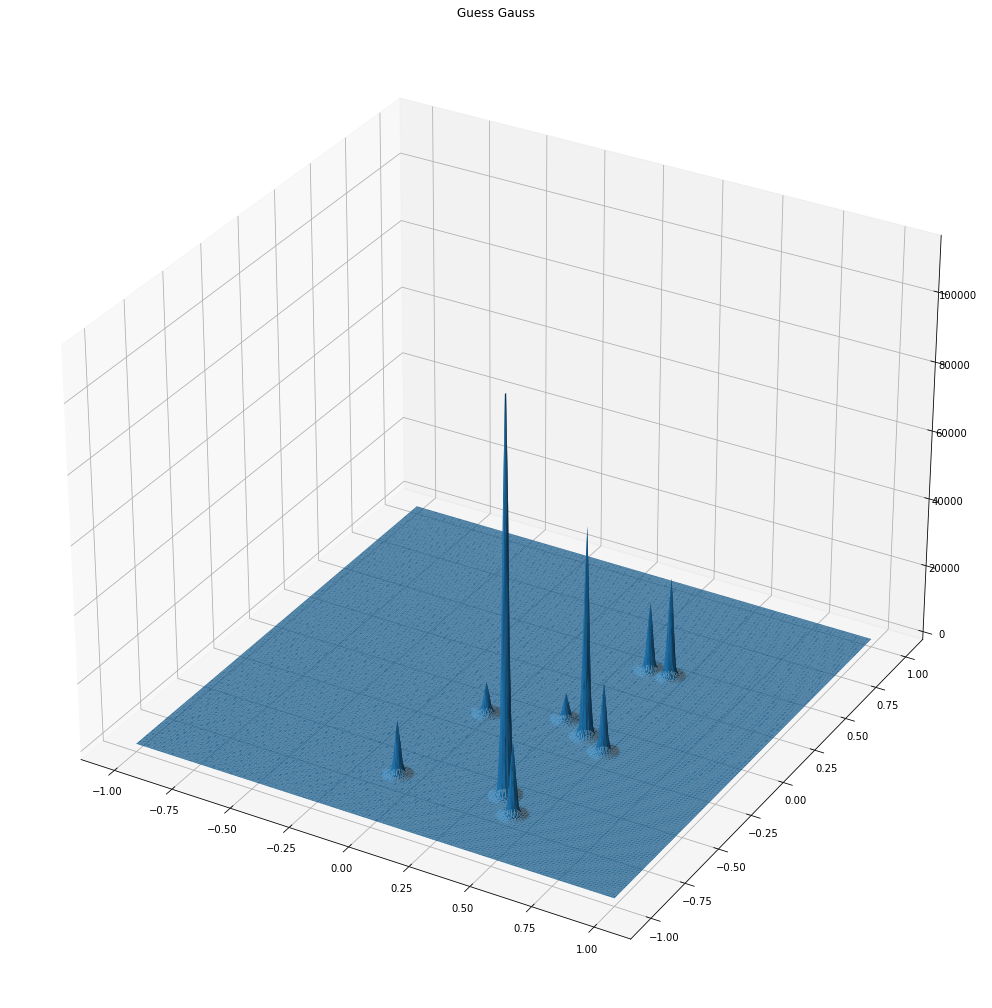

In [6]:
# Sum of Gaussian Guess
tic = time.perf_counter()
Z = ccd_helpers.sum_2dgaussians(x_grid, y_grid, peak_param).flatten()
toc = time.perf_counter()
print(f"Completed the optimization in {toc - tic:0.4f} seconds")

ccd_helpers.tri_plot(X, Y, Z, "Guess Gauss")


Completed the optimization in 5.2517 seconds


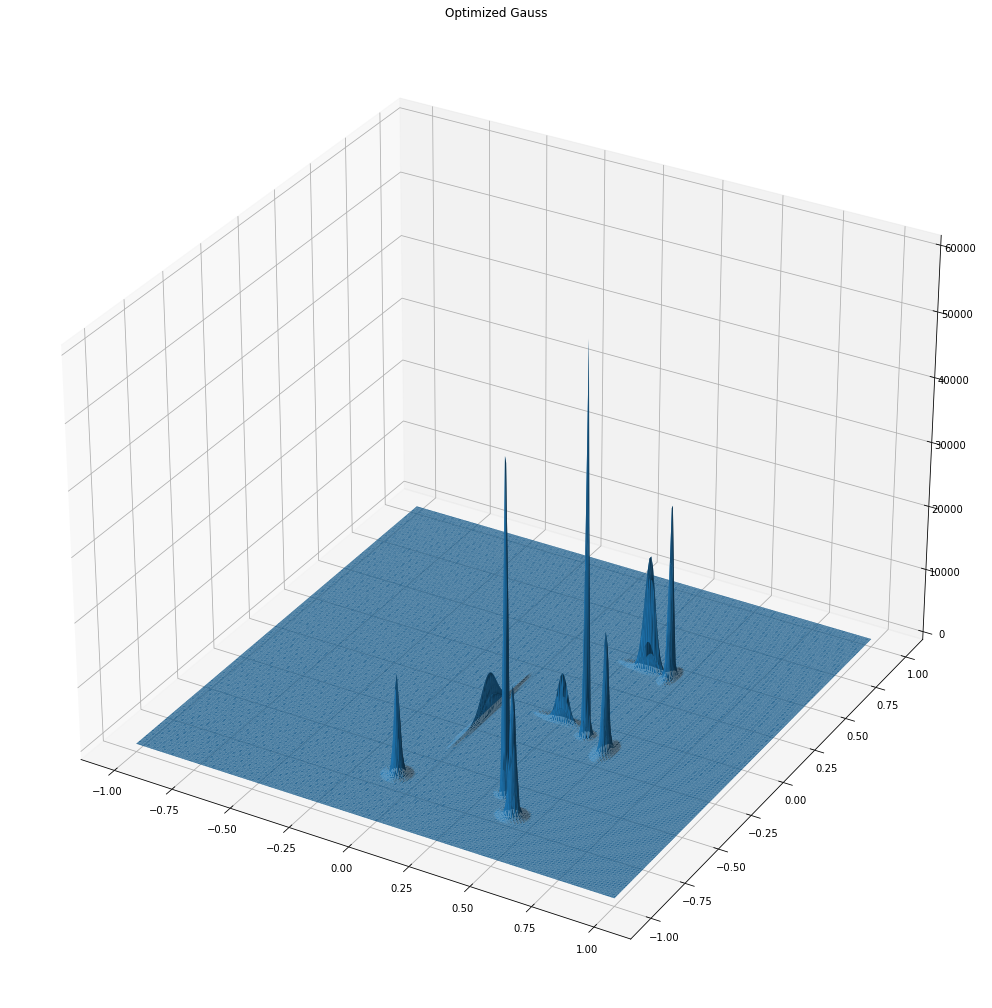

In [7]:
from scipy.optimize import minimize
tic = time.perf_counter()
res = minimize(fun, peak_param, method='COBYLA', tol=1e-3, options={'disp': True})
toc = time.perf_counter()
print(f"Completed the optimization in {toc - tic:0.4f} seconds")

X = x_grid.flatten()
Y = y_grid.flatten()

Z = ccd_helpers.sum_2dgaussians(x_grid, y_grid, res.x).flatten()
ccd_helpers.tri_plot(X, Y, Z, "Optimized Gauss")


Completed the optimization in 7.3349 seconds


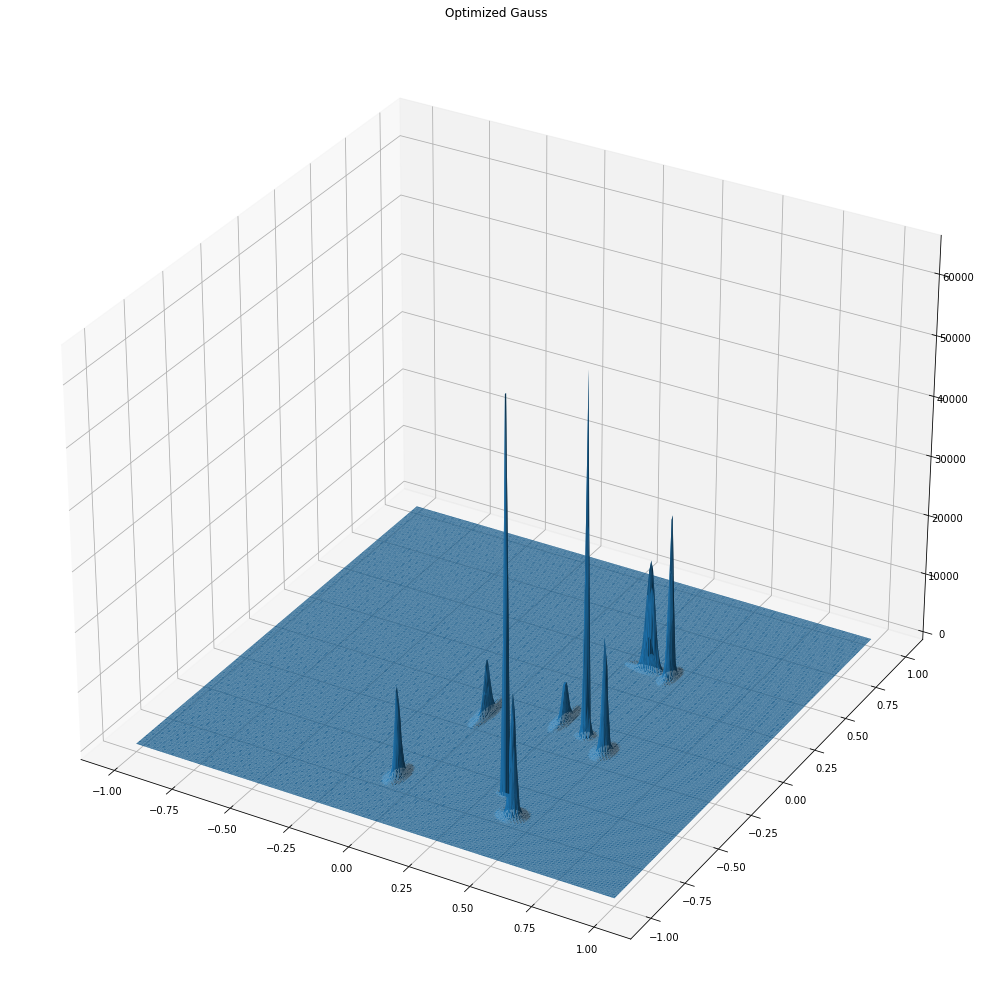

In [8]:
tic = time.perf_counter()
res = minimize(fun, peak_param, method='L-BFGS-B', tol=1e-3, options={'disp': True})
toc = time.perf_counter()
print(f"Completed the optimization in {toc - tic:0.4f} seconds")

X = x_grid.flatten()
Y = y_grid.flatten()

Z = ccd_helpers.sum_2dgaussians(x_grid, y_grid, res.x).flatten()
ccd_helpers.tri_plot(X, Y, Z, "Optimized Gauss")
